## Google Drive setting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/AIncome

/content/drive/MyDrive/AIncome


In [3]:
!pwd

/content/drive/MyDrive/AIncome


### 作業フォルダ

In [4]:
!mkdir AutoTrade02

mkdir: cannot create directory ‘AutoTrade02’: File exists


In [5]:
%cd  AutoTrade02

/content/drive/MyDrive/AIncome/AutoTrade02


In [6]:
!pwd

/content/drive/MyDrive/AIncome/AutoTrade02


## 必要パッケージのインストール

In [7]:
#!pip install gym[all] -U
!pip install "gym==0.19.0"
!pip install stable-baselines[mpi]
!pip install tensorflow==1.14.0
!pip install pyqt5
!pip install imageio
!pip install gym-anytrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## インポート


In [8]:
import os, gym
import gym_anytrading
import matplotlib.pyplot as plt
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from stable_baselines import ACKTR
from stable_baselines.bench import Monitor
from stable_baselines.common import set_global_seeds



/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




ValueError: ignored

## 設定

In [ ]:
# ログフォルダの生成
log_dir = './logs/'
os.makedirs(log_dir, exist_ok=True)

# 2020年1月1日最初のインデックス
idx1 = 10
# 2020年5月31日最後のインデックス
idx2 = 300
# 2020年1月1日最初から2020年5月31日最後のデータ数
span = idx2 - idx1



## 環境の生成

In [12]:
# 環境の生成
env = gym.make('forex-v0', frame_bound=(idx1, idx2), window_size=10)
env = Monitor(env, log_dir, allow_early_resets=True)

# シードの指定
env.seed(0)
set_global_seeds(0)

# ベクトル化環境の生成
env = DummyVecEnv([lambda: env])

# モデルの生成
model = PPO2('MlpPolicy', env, verbose=1)
#model = ACKTR('MlpPolicy', env, verbose=1)

# モデルの読み込み
# model = PPO2.load('trading_model')

## 学習

In [13]:
# モデルの学習
model.learn(total_timesteps=128000)

# モデルの保存
model.save('trading_model')

ストリーミング出力は最後の 5000 行に切り捨てられました。
| serial_timesteps   | 85376          |
| time_elapsed       | 89.8           |
| total_timesteps    | 85376          |
| value_loss         | 699.543        |
---------------------------------------
---------------------------------------
| approxkl           | 4.803229e-06   |
| clipfrac           | 0.0            |
| ep_len_mean        | 289            |
| ep_reward_mean     | 166            |
| explained_variance | -3.58e-07      |
| fps                | 1011           |
| n_updates          | 668            |
| policy_entropy     | 0.5915557      |
| policy_loss        | -0.00012180582 |
| serial_timesteps   | 85504          |
| time_elapsed       | 90             |
| total_timesteps    | 85504          |
| value_loss         | 534.26917      |
---------------------------------------
--------------------------------------
| approxkl           | 0.0001412293  |
| clipfrac           | 0.0           |
| ep_len_mean        | 289           |
| ep_reward_

## モデルのテスト

In [11]:
env = gym.make('forex-v0', frame_bound=(idx1, idx2), window_size=10)
env.seed(0)
state = env.reset()
while True:
    # 行動の取得
    action, _ = model.predict(state)
    # 1ステップ実行
    state, reward, done, info = env.step(action)
    # エピソード完了
    if done:
        print('info:', info)
        break

info: {'total_reward': -363.3000000000041, 'total_profit': 0.9551622411792473, 'position': 1}


## グラフのプロット

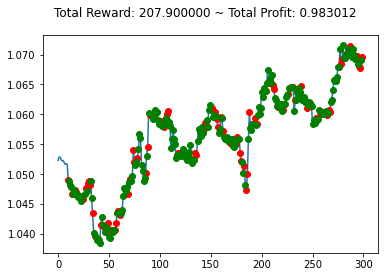

In [10]:
plt.cla()
env.render_all()
plt.show()